In [4]:
import pandas as pd
import json

In [54]:
data_dir = r"D:\code\SmartLLM\config\env_config.json"
with open(data_dir, 'r') as file:
    data = json.load(file)

xmin = data['环境配置']['整体布局']['xmin']
xhigh = data['环境配置']['整体布局']['xhigh']
ymin = data['环境配置']['整体布局']['ymin']
yhigh = data['环境配置']['整体布局']['yhigh']

map_matrix = [[-1] * (yhigh - ymin + 1) for _ in range(xhigh - xmin + 1)]

# 布置区域
sector = data['环境配置']['有效区域']
for key, value in sector.items():
    for _, sector0 in value['范围'].items():
        xmin = sector0['xmin']
        xhigh = sector0['xhigh']
        ymin = sector0['ymin']
        yhigh = sector0['yhigh']
        for i in range(xmin, xhigh + 1):
            for j in range(ymin, yhigh + 1):
                map_matrix[i][j] = 1

# 布置传感器
sensor = data['环境配置']['传感器']
for key, value in sensor.items():
    x = value['x']
    y = value['y']
    if 'Door' in key:
        map_matrix[x][y] = 2
    elif 'Motion' in key:
        map_matrix[x][y] = 3
    else:
        raise Exception("no such sensor type")

# 布置设备
device = data['环境配置']['控制设备']
for key, value in device.items():
    x = value['x']
    y = value['y']
    map_matrix[x][y] = 4

# 布置设施
device = data['环境配置']['设施']
for key, value in device.items():
    x = value['x']
    y = value['y']
    map_matrix[x][y] = 5

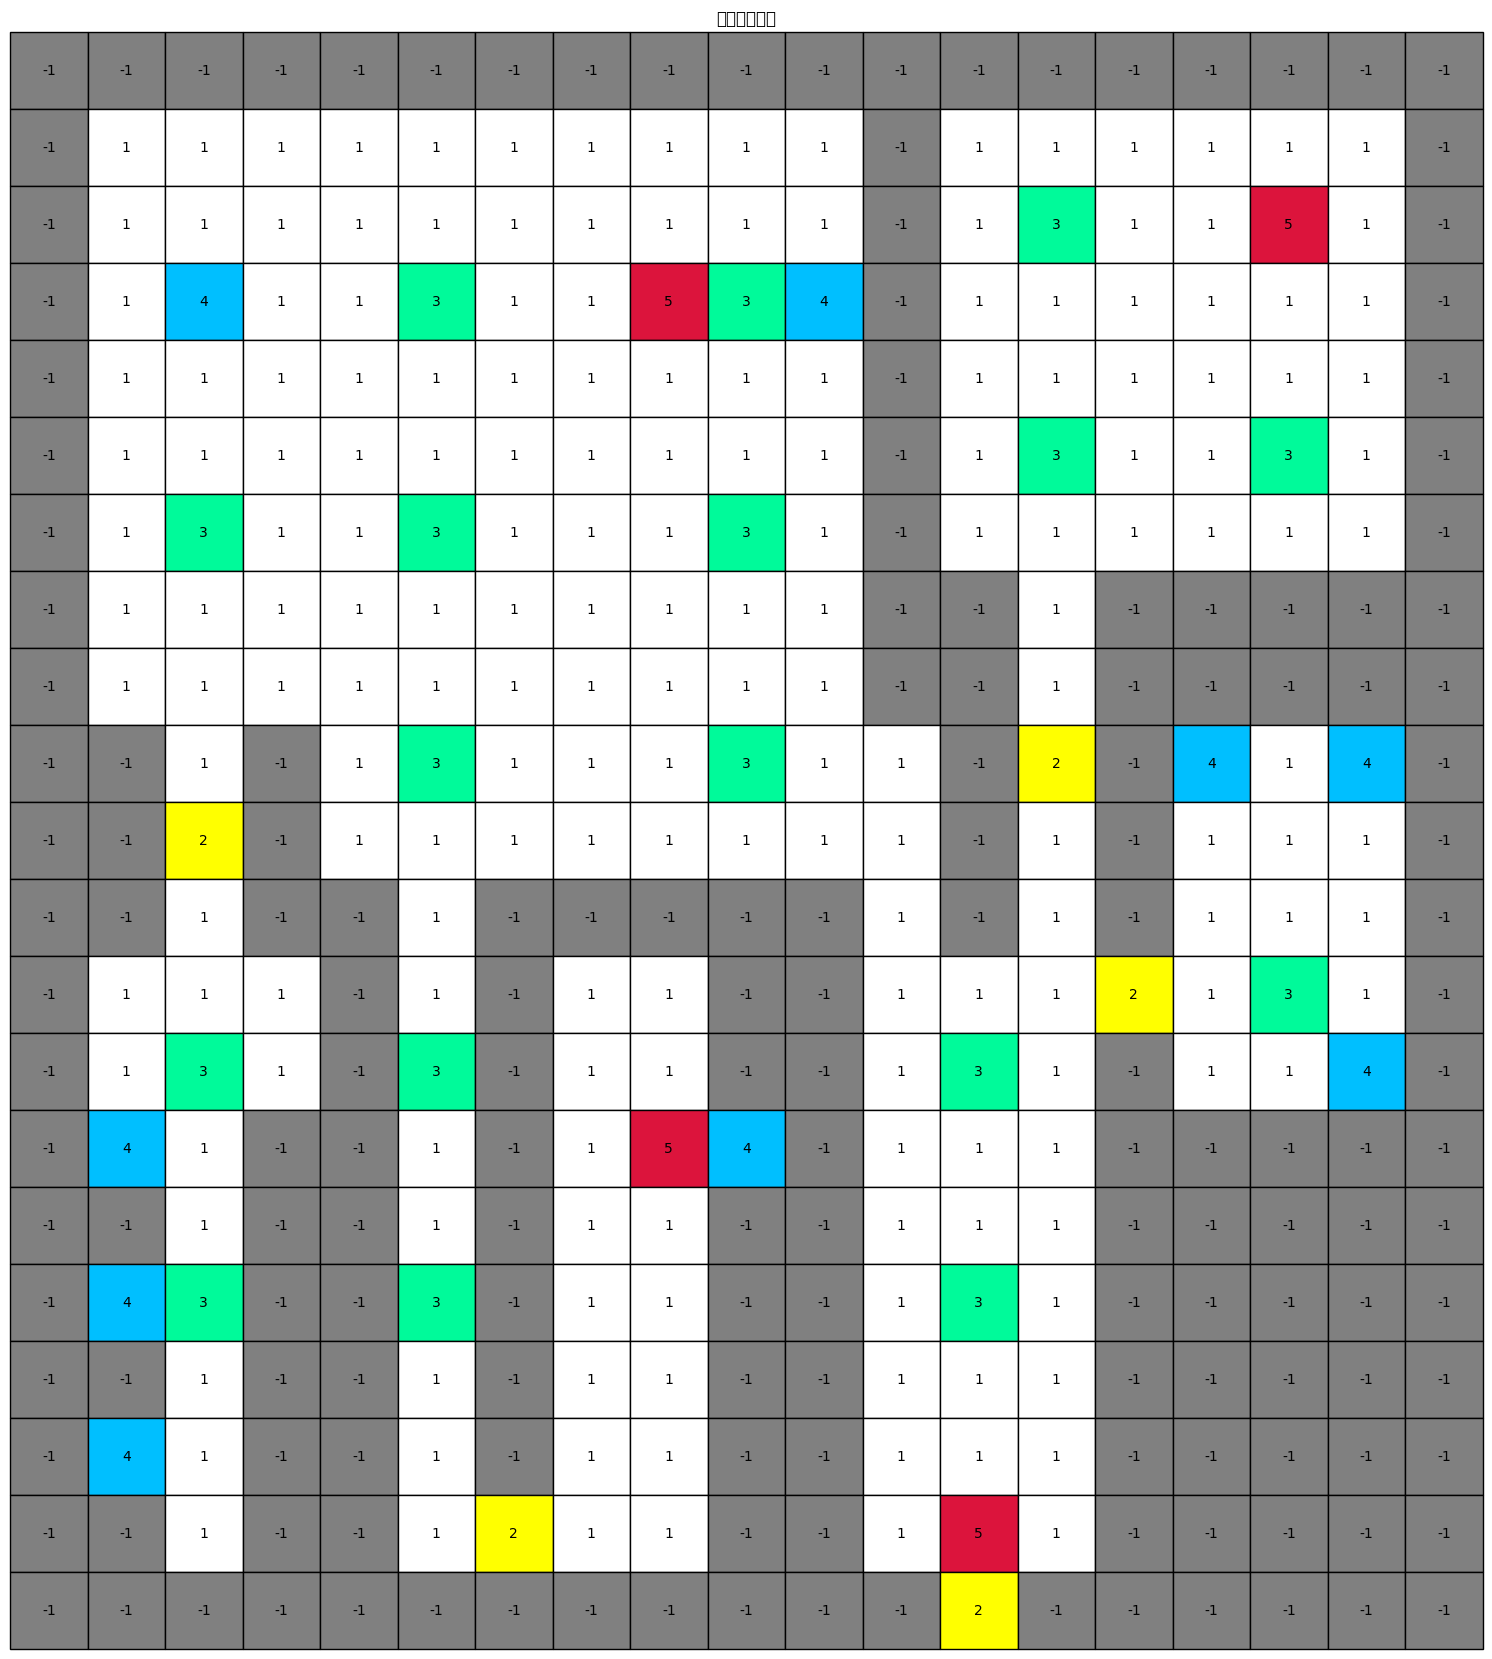

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table


def create_color_table(matrix):
    # 定义颜色映射，1-5分别对应不同颜色
    color_map = {
        1: "#FFFFFF",  # 白色
        2: "#FFFF00",  # 黄色
        3: "#00FA9A",  # 绿色
        4: "#00BFFF",  # 蓝色
        5: "#DC143C",  # 红色
        -1: "#808080"  # 灰色
    }

    # 获取矩阵的行列数
    n_rows, n_cols = len(matrix), len(matrix[0])

    # 创建图形和坐标轴
    fig, ax = plt.subplots(figsize=(n_cols, n_rows))
    ax.set_axis_off()  # 隐藏坐标轴

    # 创建表格
    table = Table(ax, bbox=[0, 0, 1, 1])

    # 添加单元格
    cell_width = 1.0 / n_cols
    cell_height = 1.0 / n_rows

    for i in range(n_rows):
        for j in range(n_cols):
            value = matrix[i][j]
            # 确保值在1-5范围内
            if value not in color_map:
                raise ValueError(f"矩阵值必须是1-5之间的整数，发现值: {value}")

            # 添加单元格，设置背景颜色
            table.add_cell(i, j, cell_width, cell_height, text=value,
                           loc='center', facecolor=color_map[value])

    # 将表格添加到坐标轴
    ax.add_table(table)

    plt.title("矩阵颜色表格")
    plt.show()


# 可视化房间
create_color_table(map_matrix)

In [59]:
data_dir = r"D:\code\SmartLLM\config\activity_config.json"
with open(data_dir, 'r') as file:
    data = json.load(file)

activity_str = ''
for activity in data['活动配置']:
    activity_name = activity['活动名称']
    activity_str = activity_name + ', ' + activity_str
print(activity_str)

电话, 外出, 厕所, 洗浴, 洗漱, 看书, 看电视, 工作, 做饭, 洗碗, 吃饭, 日间休息, 睡觉, 


In [70]:
# load user profile
user_profile_dir = r"config\user_profile.json"
with open(user_profile_dir, 'r', encoding='utf-8') as file:
    user_profile = json.load(file)

user_choose="居家工作"
user_profile_choose=user_profile['用户配置'][user_choose]
user_profile=user_profile_choose['简介']
user_lifestyle=''
for i,lifestyle_i in enumerate(user_profile_choose['特性']):
    user_lifestyle+=f'{i+1}.{lifestyle_i};'
print(user_profile)
print(user_lifestyle)

一名居家工作者，精力比较强，工作日需要工作和保持稳定的作息，周末喜欢外出
1.休息频率低;2.工作日需要工作6h;3.外出次数多，时间长;4.吃饭简单;5.作息23点睡，8点起;
